### Область работы 1 (библиотеки)

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors

from sklearn.model_selection import train_test_split, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import cross_val_score, train_test_split, validation_curve, GridSearchCV, KFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.naive_bayes import GaussianNB

### Область работы 2 (поиск лучшей модели)

In [2]:
path_train = 'cit_train.csv'
cit_df = pd.read_csv(path_train)
cit_df.head()

,name,diameter,weight,red,green,blue
0,grapefruit,11.60,199.71,153,59,16
1,grapefruit,10.25,178.06,148,54,14
2,grapefruit,11.99,205.39,133,72,2
3,orange,7.63,139.91,152,82,2
4,orange,7.43,137.10,158,78,3


In [4]:
cit_df.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [5]:
cit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7500 non-null   object 
 1   diameter  7500 non-null   float64
 2   weight    7500 non-null   float64
 3   red       7500 non-null   int64  
 4   green     7500 non-null   int64  
 5   blue      7500 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 351.7+ KB


In [6]:
cit_df.describe()

,diameter,weight,red,green,blue
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,9.973384,175.019732,153.723867,76.039733,11.364933
std,1.944686,29.153906,10.346053,11.740608,9.036016
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.467500,152.375000,147.000000,68.000000,2.000000
50%,9.980000,175.000000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,113.000000,56.000000


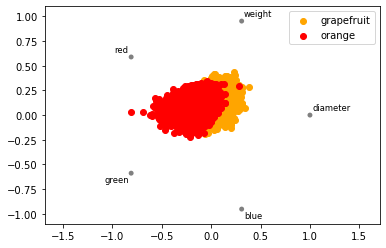

In [7]:
pd_plt.radviz(cit_df, 'name', colormap=plt_colors.ListedColormap(['orange','red']))
plt.show()

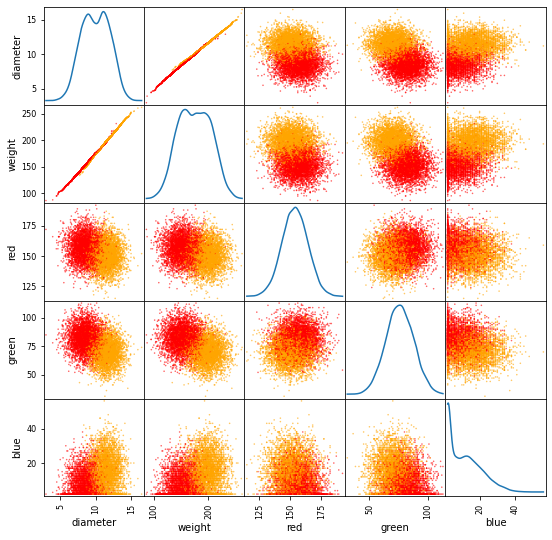

In [8]:
pd_plt.scatter_matrix(cit_df,
                     c=pd.factorize(cit_df['name'])[0],
                     alpha = 0.6,
                     s=10,
                     figsize=(9,9),
                     diagonal='kde',
                     cmap = plt_colors.ListedColormap(['orange','red']))
plt.show()

In [14]:
cit_df = pd.get_dummies(cit_df).drop(columns = 'name_orange').rename(columns={'name_grapefruit':'is_grapefruit'})
X = cit_df.drop(columns = 'is_grapefruit')
y = cit_df['is_grapefruit']

KeyError: "['name_orange'] not found in axis"

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
knk = KNeighborsClassifier()
param_grid = [{
    'n_neighbors': (range(1,30,1)),
    'weights' : ['uniform','distance'],
    'p': [1,2,3]
}]
cv = KFold()
grid = GridSearchCV(knk, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': range(1, 30), 'p': [1, 2, 3],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True)

In [18]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,170,158,164,156,171,168,160,153,152,165,...,11,2,3,9,10,8,0,1,7,6
mean_fit_time,0.003935,0.006284,0.003855,0.011917,0.004897,0.003802,0.006589,0.003954,0.004336,0.004025,...,0.003717,0.004009,0.005149,0.004071,0.003955,0.004497,0.004197,0.004828,0.004739,0.004198
std_fit_time,0.000454,0.003834,0.000206,0.007652,0.002044,0.000193,0.005613,0.000424,0.000428,0.000346,...,0.000065,0.000554,0.002362,0.000561,0.000526,0.000904,0.000588,0.000591,0.001016,0.000618
mean_score_time,0.048498,0.064929,0.0461,0.165555,0.019582,0.051225,0.104163,0.018758,0.055403,0.01972,...,0.02493,0.037126,0.010436,0.00713,0.05478,0.036654,0.041566,0.008336,0.011325,0.039903
std_score_time,0.004691,0.018161,0.003227,0.07585,0.001866,0.003216,0.017039,0.000945,0.009719,0.001867,...,0.001426,0.004724,0.00652,0.000732,0.00189,0.002683,0.010396,0.000125,0.002363,0.005091
param_n_neighbors,29,27,28,27,29,29,27,26,26,28,...,2,1,1,2,2,2,1,1,2,2
param_p,2,2,2,1,2,1,3,2,2,2,...,3,2,2,2,3,2,1,1,1,1
param_weights,uniform,uniform,uniform,uniform,distance,uniform,uniform,distance,uniform,distance,...,distance,uniform,distance,distance,uniform,uniform,uniform,distance,distance,uniform
params,"{'n_neighbors': 29, 'p': 2, 'weights': 'uniform'}","{'n_neighbors': 27, 'p': 2, 'weights': 'uniform'}","{'n_neighbors': 28, 'p': 2, 'weights': 'uniform'}","{'n_neighbors': 27, 'p': 1, 'weights': 'uniform'}","{'n_neighbors': 29, 'p': 2, 'weights': 'distan...","{'n_neighbors': 29, 'p': 1, 'weights': 'uniform'}","{'n_neighbors': 27, 'p': 3, 'weights': 'uniform'}","{'n_neighbors': 26, 'p': 2, 'weights': 'distan...","{'n_neighbors': 26, 'p': 2, 'weights': 'uniform'}","{'n_neighbors': 28, 'p': 2, 'weights': 'distan...",...,"{'n_neighbors': 2, 'p': 3, 'weights': 'distance'}","{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}","{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}","{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}","{'n_neighbors': 2, 'p': 3, 'weights': 'uniform'}","{'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}","{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}","{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}","{'n_neighbors': 2, 'p': 1, 'weights': 'distance'}","{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}"
split0_test_score,0.92381,0.92381,0.924762,0.92381,0.925714,0.924762,0.92381,0.925714,0.922857,0.924762,...,0.89619,0.891429,0.891429,0.891429,0.888571,0.888571,0.884762,0.884762,0.884762,0.88381
split1_test_score,0.933333,0.928571,0.928571,0.927619,0.926667,0.927619,0.930476,0.925714,0.929524,0.925714,...,0.895238,0.897143,0.897143,0.897143,0.901905,0.900952,0.885714,0.885714,0.885714,0.891429


In [19]:
print(classification_report(y_test, grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1125
           1       0.93      0.92      0.92      1125

    accuracy                           0.92      2250
   macro avg       0.92      0.92      0.92      2250
weighted avg       0.92      0.92      0.92      2250



In [20]:
print(roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))

0.9774198518518519


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression())])
cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling,'clf__penalty': ['l2'], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga']},
    {'preprocessing': scaling,'clf__penalty': ['l1'], 
         'clf__solver': ['liblinear']},
    {'preprocessing': scaling,'clf__penalty': ['none'], 
         'clf__solver': ['lbfgs','newton-cg']}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid=[{'clf__penalty': ['l2'],
                          'clf__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                          'sag', 'saga'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': ['l1'], 'clf__solver': ['liblinear'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': ['none'],
                          'clf__solver': ['lbfgs', 'newton-cg'],
                          'preprocessing': [MinMax

In [22]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,24,25,26,28,29,30,21,22,27,31,...,4,12,16,8,23,3,7,11,15,19
mean_fit_time,0.029368,0.020683,0.024008,0.042954,0.031271,0.031658,0.055599,0.066618,0.033596,0.093604,...,0.021698,0.013389,0.014718,0.010989,0.067944,0.022159,0.015505,0.008239,0.013321,0.010222
std_fit_time,0.002696,0.000734,0.005632,0.007701,0.002444,0.001065,0.005983,0.008345,0.002617,0.012479,...,0.00598,0.00236,0.003348,0.004851,0.00291,0.002219,0.001691,0.00051,0.001788,0.000468
mean_score_time,0.002777,0.002413,0.0056,0.001926,0.00195,0.001924,0.002116,0.002891,0.001906,0.002038,...,0.002718,0.002272,0.002338,0.001969,0.002919,0.002884,0.001954,0.002599,0.002152,0.001714
std_score_time,0.000777,0.00053,0.006243,0.000056,0.000058,0.000024,0.000135,0.00072,0.000032,0.000125,...,0.000519,0.000739,0.000436,0.000179,0.000697,0.000744,0.000052,0.000554,0.000262,0.000023
param_clf__penalty,none,none,none,none,none,none,l1,l1,none,none,...,l2,l2,l2,l2,l1,l2,l2,l2,l2,l2
param_clf__solver,lbfgs,lbfgs,lbfgs,newton-cg,newton-cg,newton-cg,liblinear,liblinear,lbfgs,newton-cg,...,lbfgs,sag,saga,liblinear,liblinear,newton-cg,lbfgs,liblinear,sag,saga
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),StandardScaler(),RobustScaler(),Normalizer(),Normalizer(),...,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'newto...",...,"{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ..."
split0_test_score,0.966825,0.966825,0.966825,0.966825,0.966825,0.966825,0.959716,0.956754,0.953199,0.953199,...,0.93128,0.93128,0.93128,0.92891,0.92891,0.923578,0.923578,0.923578,0.923578,0.923578
split1_test_score,0.968009,0.968009,0.968009,0.968009,0.968009,0.968009,0.96327,0.962085,0.954976,0.954976,...,0.925355,0.925355,0.925355,0.923578,0.921209,0.915877,0.915877,0.915877,0.915877,0.915877


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(penalty='l1', solver='liblinear'))])


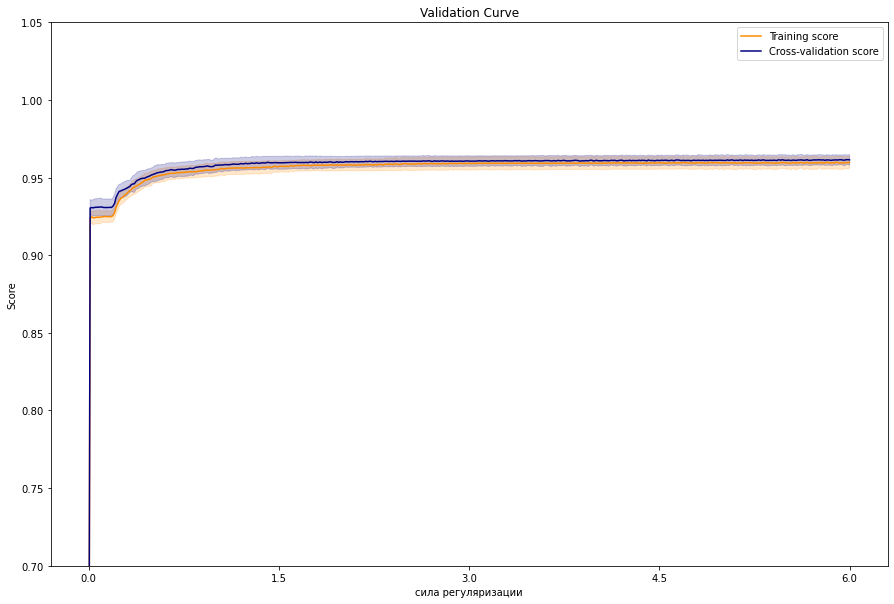

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
pipe_1 = make_pipeline(StandardScaler(), LogisticRegression(solver = 'liblinear', penalty = 'l1'))
print(pipe_1)
n_range = np.linspace(0.0001, 6, 500)
train_scores, test_scores = validation_curve(
    pipe_1, X_train, y_train,
    param_name = "logisticregression__C", 
    param_range = n_range,
    cv = cv, 
    scoring="accuracy", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve")
plt.xlabel("сила регуляризации")
plt.ylabel("Score")
plt.ylim(0.7, 1.05)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")

plt.xticks(np.linspace(0, 6, 5))
plt.legend(loc="best")
plt.show()

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])


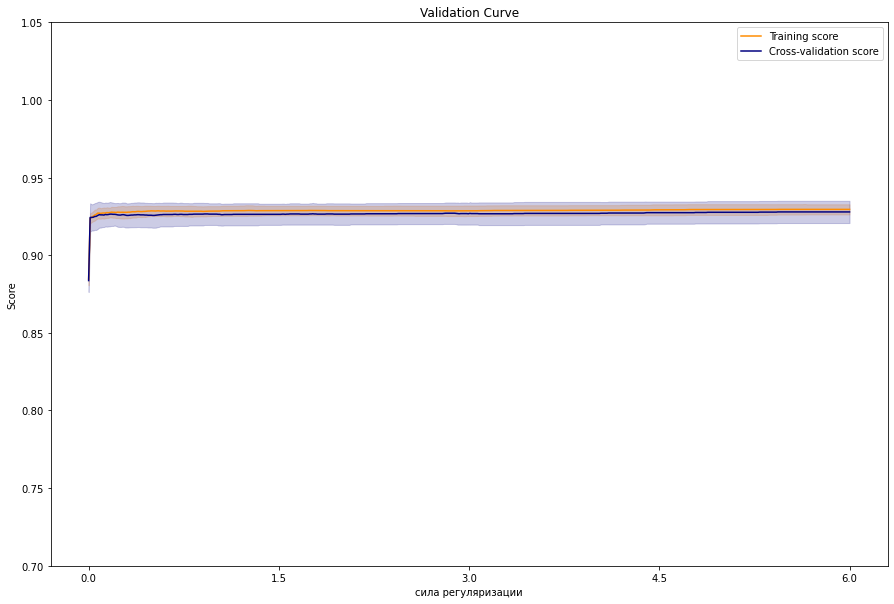

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
pipe_2 = make_pipeline(MinMaxScaler(), LogisticRegression(solver = 'lbfgs', penalty = 'l2'))
print(pipe_2)
n_range = np.linspace(0.0001, 6, 500)
train_scores, test_scores = validation_curve(
    pipe_2, X_train, y_train,
    param_name = "logisticregression__C", 
    param_range = n_range,
    cv = cv, 
    scoring="accuracy", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve")
plt.xlabel("сила регуляризации")
plt.ylabel("Score")
plt.ylim(0.7, 1.05)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")

plt.xticks(np.linspace(0, 6, 5))
plt.legend(loc="best")
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
pipe_end = make_pipeline( StandardScaler(), LogisticRegression(solver = 'liblinear', penalty = 'l1', C = 1))
pipe_end.fit(X_train,y_train)
y_pred_end = pipe_end.predict(X_test)
pipe_end.score(X_test, y_test)
print(roc_auc_score(y_test, pipe_end.predict_proba(X_test)[:,1]))

0.9914034567901234


In [49]:

print(classification_report(y_test, y_pred_end))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1125
           1       0.95      0.98      0.97      1125

    accuracy                           0.97      2250
   macro avg       0.97      0.97      0.97      2250
weighted avg       0.97      0.97      0.97      2250



In [50]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           GaussianNB())])

cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling, 
     'clf': [GaussianNB()]}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', GaussianNB())]),
             param_grid=[{'clf': [GaussianNB()],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True)

In [51]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,0,1,2,3
mean_fit_time,0.010407,0.004917,0.006101,0.004165
std_fit_time,0.006283,0.000088,0.00026,0.000067
mean_score_time,0.002755,0.00211,0.002011,0.002035
std_score_time,0.000894,0.000055,0.000048,0.00005
param_clf,GaussianNB(),GaussianNB(),GaussianNB(),GaussianNB()
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'clf': GaussianNB(), 'preprocessing': MinMaxS...","{'clf': GaussianNB(), 'preprocessing': Standar...","{'clf': GaussianNB(), 'preprocessing': RobustS...","{'clf': GaussianNB(), 'preprocessing': Normali..."
split0_test_score,0.91873,0.91873,0.91873,0.911111
split1_test_score,0.919365,0.919365,0.919365,0.908571
split2_test_score,0.906667,0.906667,0.906667,0.906667


In [52]:
print(classification_report(y_test, grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1125
           1       0.93      0.93      0.93      1125

    accuracy                           0.93      2250
   macro avg       0.93      0.93      0.93      2250
weighted avg       0.93      0.93      0.93      2250



### Область работы 3 (выполнение лучшей модели)

In [140]:
path_train = 'cit_train.csv'
path_test  = 'cit_test.csv'

In [141]:
# Блок(и) обучения и поверки модели

In [142]:
train_df = pd.read_csv(path_train)
train_df = pd.get_dummies(train_df).drop(columns = 'name_orange').rename(columns={'name_grapefruit':'is_grapefruit'})
X_train = train_df.drop(columns = 'is_grapefruit')
y_train = train_df['is_grapefruit']
X_test = pd.read_csv(path_test)
pipe_end = make_pipeline( StandardScaler(), LogisticRegression(solver = 'liblinear', penalty = 'l1', C = 1))
pipe_end.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, penalty='l1', solver='liblinear'))])

In [143]:
# Блок предсказания с использованием тестового набора

In [144]:
y_pipe_pred = pipe_end.predict(X_test)
y_pipe_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=uint8)

In [145]:
y_pipe_pred = y_pipe_pred.astype(object)
y_pipe_pred[y_pipe_pred == 1] = 'grapefruit'
y_pipe_pred[y_pipe_pred == 0] = 'orange'
y_pipe_pred

array(['orange', 'orange', 'orange', ..., 'grapefruit', 'orange',
       'grapefruit'], dtype=object)

In [80]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = y_pipe_pred